<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
# **<center>Book Recommendation Engine** </center>

<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->

--------------------

<!-- ![alternatvie text](https://sonomalibrary.org/sites/default/files/images/WhatShouldIReadNext_ICON-01.png) -->


<img style="float: right;" src=https://sonomalibrary.org/sites/default/files/images/WhatShouldIReadNext_ICON-01.png width="500">


**<br>2023W-T2 BDM 3014 - Introduction to Artificial Intelligence**
<br>Group 2:
<br>&emsp;&emsp;Jefford Secondes
<br>&emsp;&emsp;Jovi Fez Bartolata
<br>&emsp;&emsp;Luz Zapanta
<br>&emsp;&emsp;Maricris Resma


--------------------
<b>PROJECT DESCRIPTION:</b>

The purpose of a book recommendation system is to make suggestions to readers that are tailored to their individual tastes and reading habits. Collaborative filtering, content-based filtering, and hybrid approaches are just some of the methods that can be used to construct such systems.

This project will utilize content-based filtering for book-recommendation systems. Essentially, the goal is to provide the user with more content that is similar to what they have already enjoyed. The system could make recommendations based on author, genre, or plot, such as 
suggesting more J.K. Rowling books if the user has enjoyed the author's other books in the past


**OBJECTIVES:**
- The project aims to build a recommendation engine that can be used to suggest books that are more relevant to the users
- To create content-based recommendations engines using single and a combination of multiple attributes

<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
------------

In [24]:
# Import libraries
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import ipywidgets
from ipywidgets import interact
from ipywidgets import interact_manual

from sklearn.preprocessing import MinMaxScaler
from sklearn import neighbors

import warnings
warnings.filterwarnings('ignore')

In [25]:
# Import and append all raw files
def ImportFiles(dir_name=''):
    
    # Get directory contents
    if dir_name == '':
        list_of_files = os.listdir()
    else:
        list_of_files = os.listdir(dir_name)

    all_data = pd.DataFrame()   # Create an empty dataframe
    counter = 0
    
    for each_file in list_of_files:
        if each_file.startswith('book') and each_file.endswith('.csv'): # Filter using filename
            # Import each file
            in_data = pd.read_csv(each_file,dtype='unicode',
                                  usecols = ['Name', 'Rating', 'PublishYear', 'PublishMonth',
                                             'PublishDay', 'Authors', 'Publisher', 'Language',
                                             'CountsOfReview', 'ISBN', 'pagesNumber', 'Id'])
            all_data = pd.concat([all_data,in_data], ignore_index=True) # Append file
            print(each_file)                                       # Print filename
            counter += 1
    print('-- Number of Files:',counter)

    return all_data

input_data = ImportFiles()

book100k-200k.csv
book200k-300k.csv
book300k-400k.csv
book400k-500k.csv
book500k-600k.csv
-- Number of Files: 5


In [26]:
# Display dataset information
input_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279828 entries, 0 to 279827
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   pagesNumber     279828 non-null  object
 1   Authors         279828 non-null  object
 2   Publisher       277176 non-null  object
 3   Rating          279828 non-null  object
 4   Language        57002 non-null   object
 5   CountsOfReview  279828 non-null  object
 6   PublishDay      279828 non-null  object
 7   ISBN            278854 non-null  object
 8   PublishMonth    279828 non-null  object
 9   Id              279828 non-null  object
 10  PublishYear     279828 non-null  object
 11  Name            279828 non-null  object
dtypes: object(12)
memory usage: 25.6+ MB


<b>Observations:</b>
- The raw data has 279,828 rows/observations and 12 columns.
- Currently, all variables have data type = object. We need to change the data type of the columns that should be numeric.

In [27]:
# Change data type of columns
input_data = input_data.astype({'pagesNumber':'int'})
input_data = input_data.astype({'CountsOfReview':'int'})
input_data = input_data.astype({'Rating':'float'})
input_data = input_data.astype({'PublishYear':'int'})

# Display information and sample records
input_data.info()
input_data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 279828 entries, 0 to 279827
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   pagesNumber     279828 non-null  int32  
 1   Authors         279828 non-null  object 
 2   Publisher       277176 non-null  object 
 3   Rating          279828 non-null  float64
 4   Language        57002 non-null   object 
 5   CountsOfReview  279828 non-null  int32  
 6   PublishDay      279828 non-null  object 
 7   ISBN            278854 non-null  object 
 8   PublishMonth    279828 non-null  object 
 9   Id              279828 non-null  object 
 10  PublishYear     279828 non-null  int32  
 11  Name            279828 non-null  object 
dtypes: float64(1), int32(3), object(8)
memory usage: 22.4+ MB


,pagesNumber,Authors,Publisher,Rating,Language,CountsOfReview,PublishDay,ISBN,PublishMonth,Id,PublishYear,Name
0,196,Bonham Norton,Greyden Press,0.0,NaN,0,12,1583290060,1,166641,1623,The Booke of Psalmes and Geneologies
1,216,Jane G. Austin,Reprint Services Corp,3.7,NaN,0,1,781218209,1,104616,1859,Fairy Dreams
2,319,Jane G. Austin,Reprint Services Corp,0.0,NaN,0,1,781218276,1,155939,1880,Mrs. Beauchamp Brown
3,391,Jane G. Austin,Reprint Services Corp,4.2,NaN,0,1,781218365,1,155888,1892,David Alden's Daughter
4,126,George A. Waltrous,Reprint Services Corp,4.0,NaN,1,1,NaN,1,162270,1898,Three Narrative Poems


<b>Observations:</b>
- Data type of pagesNumber, CountsOfReview, and PublishYear have been changed to integer.
- Data type of Rating has been changed to float.

# Filter Data
This project will focus on recently published books (2010 onwards).

In [28]:
# Filter data
input_data = input_data[input_data['PublishYear']>=2010]

# Display information and sample records
input_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3110 entries, 56386 to 279827
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   pagesNumber     3110 non-null   int32  
 1   Authors         3110 non-null   object 
 2   Publisher       3073 non-null   object 
 3   Rating          3110 non-null   float64
 4   Language        758 non-null    object 
 5   CountsOfReview  3110 non-null   int32  
 6   PublishDay      3110 non-null   object 
 7   ISBN            3055 non-null   object 
 8   PublishMonth    3110 non-null   object 
 9   Id              3110 non-null   object 
 10  PublishYear     3110 non-null   int32  
 11  Name            3110 non-null   object 
dtypes: float64(1), int32(3), object(8)
memory usage: 279.4+ KB


<b>Observations:</b>
- The final dataset that will be used for the creation of recommendation engines has 3,110 rows/observations and 12 columns.

In [29]:
# Create a summary of column attributes

count_all = input_data.shape[0]

count_unique_values = []
for column in input_data:
    # Count unique values for each column
    cnt_unique_values = len(input_data[column].unique())
    count_unique_values.append(cnt_unique_values)
    
# Count null values for each column    
count_null = input_data.isnull().sum()

# Summarize column attributes using a dataframe
data_summary = pd.DataFrame()
data_summary['column_name'] = []
data_summary['data_type'] = input_data.dtypes
data_summary['column_name'] = data_summary.index

# Add details
data_summary['count_unique_values'] = count_unique_values
data_summary['count_null'] = count_null

# Compute for percentages
data_summary['pcnt_unique'] = round((data_summary['count_unique_values'] / count_all) * 100,2)
data_summary['pcnt_null'] = round((data_summary['count_null'] / count_all) * 100,2)

data_summary

,column_name,data_type,count_unique_values,count_null,pcnt_unique,pcnt_null
pagesNumber,pagesNumber,int32,563,0,18.10,0.00
Authors,Authors,object,2657,0,85.43,0.00
Publisher,Publisher,object,1227,37,39.45,1.19
Rating,Rating,float64,198,0,6.37,0.00
Language,Language,object,14,2352,0.45,75.63
CountsOfReview,CountsOfReview,int32,235,0,7.56,0.00
PublishDay,PublishDay,object,12,0,0.39,0.00
ISBN,ISBN,object,3056,55,98.26,1.77
PublishMonth,PublishMonth,object,31,0,1.00,0.00
Id,Id,object,3110,0,100.00,0.00


**Observations**
- 3 columns have missing values: Publisher (1.19%), Language (75.63%), ISBN (1.77%)
- Id is unique for all records, therefore, not useful in the modeling exercise and can be dropped from the data.

In [30]:
# Check for duplicate records
print('No. of duplicate records:',input_data.duplicated().sum())

No. of duplicate records: 0


<b>Observation:</b>
- There are no duplicate records.

In [31]:
# Summary statistics for numerical data
input_data.describe()

,pagesNumber,Rating,CountsOfReview,PublishYear
count,3110.000000,3110.000000,3110.000000,3110.000000
mean,259.349518,3.541968,34.766881,2012.796785
std,230.511763,1.263295,230.451130,2.747060
min,0.000000,0.000000,0.000000,2010.000000
25%,129.250000,3.550000,0.000000,2010.000000
50%,224.000000,3.920000,1.000000,2012.000000
75%,324.750000,4.170000,8.000000,2015.000000
max,5392.000000,5.000000,8496.000000,2020.000000


**Observations:**
- The data contains books publish from 2010 to 2020.
- Highest number of reviews for a single book is 8,496.
- The value for rating ranges from 0 to 5.

In [32]:
# Summary statistics for categorical data
input_data.describe(include='object')

,Authors,Publisher,Language,PublishDay,ISBN,PublishMonth,Id,Name
count,3110,3073,758,3110,3055,3110,3110,3110
unique,2657,1226,13,12,3055,31,3110,3106
top,National Learning Corporation,Dover Publications,eng,1,1456380168,1,102626,Curse of the Blue Tattoo: Being an Account of ...
freq,22,217,586,512,1,760,1,2


**Observations:**
- Unique values: Authors (2,657), Language (13). These attributes will be used in the content-based reco engine.

# Exploratory Data Analysis

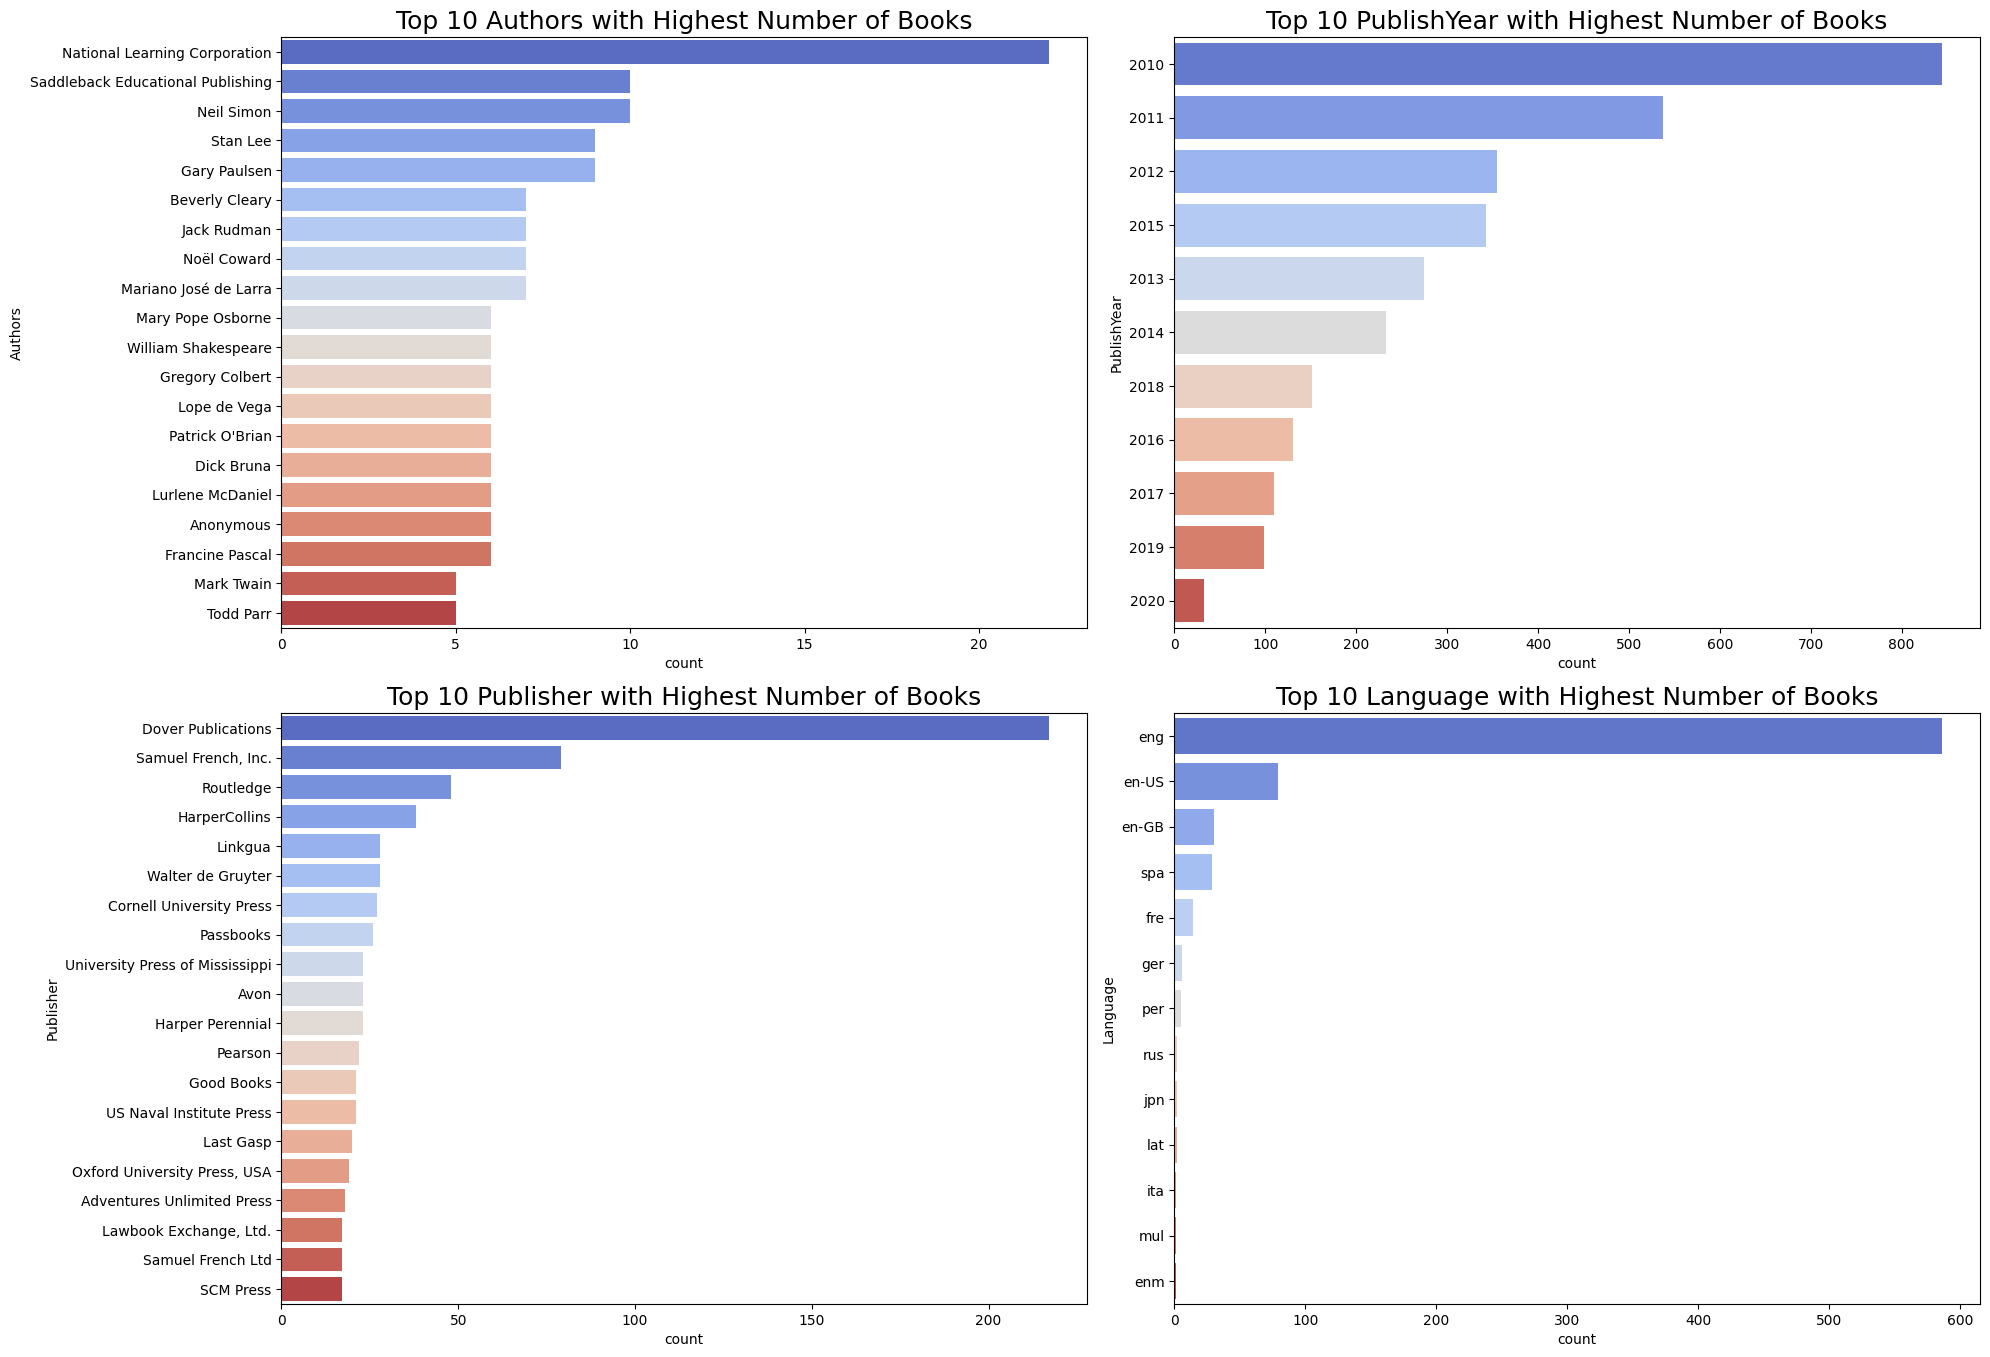

In [33]:
# Display Top 10 per category using bar chart

plt.figure(figsize = (20, 20))
plotnumber = 1

for varname in ['Authors','PublishYear','Publisher','Language']:
    ax = plt.subplot(3,2,plotnumber)
    sns.countplot(y = varname, data = input_data,
              order = input_data[varname].value_counts().iloc[:20].index, palette = "coolwarm")
    plt.title(f"Top 10 {varname} with Highest Number of Books", fontsize = 18)    
    plotnumber += 1

plt.tight_layout()
plt.show()

**Observations:**
- National Learning Corporation is the top author in terms of book count from 2010 to 2020.
- Most books are from 2010 publication year.
- Majority of the books were published by Dover Publications.
- English (eng) is the most popular language used in the books.

In [34]:
# Average rating and review count by language
input_data.groupby(['Language'])[['Rating','CountsOfReview']].agg('mean').style.format(precision=2).background_gradient(cmap='Blues')

,Rating,CountsOfReview
Language,,
en-GB,3.77,35.00
en-US,3.96,65.62
eng,3.92,139.91
enm,4.10,4.00
fre,3.58,24.86
ger,3.42,2.17
ita,4.20,0.00
jpn,3.98,1.00
lat,3.96,0.00


**Observations:**
- English books have the highest average review count at 139.91.
- Books written in Italian have the highest average rating at 4.20.

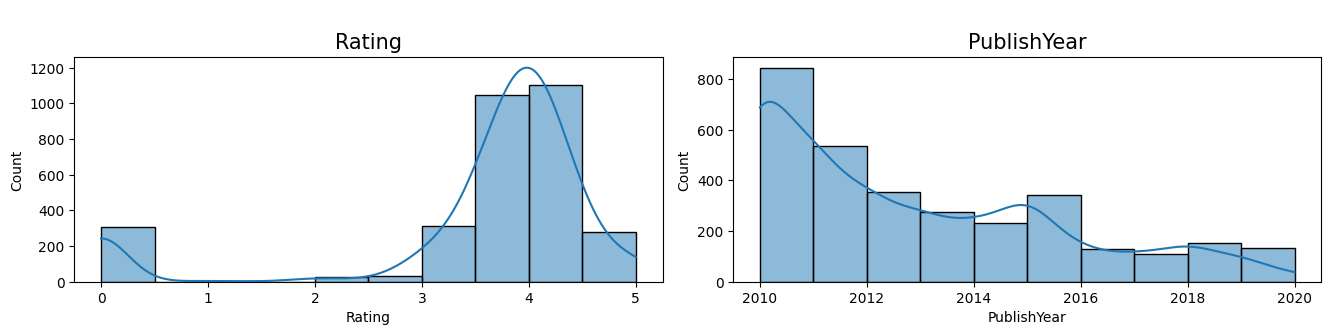

In [35]:
# Plot the histogram of Rating and PublishYear

plt.figure(figsize = (20, 20))
plot_number = 1

bins_num = 10
for varname in ['Rating','PublishYear']:
    ax = plt.subplot(7, 3, plot_number)
    sns.histplot(x = varname, data = input_data, bins = bins_num, ax=ax, kde=True)
    plt.title(f"\n{varname}", fontsize = 15)
    plot_number += 1

plt.tight_layout()
plt.show()

**Observations:**
- Rating is negatively skewed i.e., majority of books have higher ratings. However, there are some with a rating of zero (0).
- PublishYear is positively skewed i.e., the data contains older books (published around 2010) compared to latest books.

In [36]:
# Books with the highest ratings
input_data[input_data['Rating'] == input_data['Rating'].max()][['Name','Authors','Publisher','Rating','PublishYear']]

,Name,Authors,Publisher,Rating,PublishYear
56412,The Secret League of Supermen,Dan Dobson,Lulu.com,5.0,2010
56472,Glue: Sticking Power for Lifelong Marriages,Paul Endrei,Vision Imprints Publishing (V.I.P.),5.0,2010
56475,"Ernst Mach ALS Philosoph, Physiker Und Psychol...",Hans Henning,Nabu Press,5.0,2010
56477,Beyond the illusion of the ego,Raphael - Asram Vidya Order,Aurea Vidya,5.0,2010
56492,James Welch,James Welch,Confluence Press,5.0,2010
...,...,...,...,...,...
279709,Oscillations in Nonlinear Systems,Jack K. Hale,Dover Publications,5.0,2015
279770,"Mick Morris Myth Solver #2, Bigfoot...Big Trou...",K.B. Brege,K.B. Brege,5.0,2017
279784,I Stand on Holy Ground,Joel S. Goldsmith,"Acropolis Books, Inc.",5.0,2018
279792,Ruling Passion of John Gould,Isabela Tree,Grove Press,5.0,2018


**Observations:**
- Some of the highly rated books are The Secret League of Supermen by Dan Dobson, Glue: Sticking Power for Lifelong Marriages by Paul Endrei, and Programed Spelling Demons by George W. Feinstein.

<!-- ![separator1](https://i.imgur.com/RQnsV0w.png) -->
-----
# **Content-Based Recommendation Engines**
-----
Content-based recommendation engine uses similarities in the products, in this case books, to make recommendations. It can be done using a single attribute or a combination of attributes.

In [37]:
# Drop unnecessary columns. Resource limitations affect the processing time of interactive function.
 
filtered_data = input_data[['ISBN','PublishYear','Authors','Language','Rating','Name']]
filtered_data.shape

(3110, 6)

### **Book Recommendation Based on a Single Attribute**
In these examples, we will use Author and Language to recommend books. Based on the author/language selected by user, the engine will recommend highly rated books in that category. This is helpful when the user wants to explore other books written by the same author or in the same language. Moreover, the engine outputs the top rated books in each category so this is useful to first-time readers who are not yet sure which book to read.

### Book Recommendation Based on Author

In [38]:
# Function to recommend Top 10 books from the same author

@interact

def BookReco_Author(
        Author = sorted(list(filtered_data['Authors'].value_counts().index)) # For the dropdown list of authors
        ):
    
    # Filter Author
    result = filtered_data[filtered_data['Authors'] == Author][['ISBN','Name','Rating']]
    
    # Sort data by rating (highest to lowest)
    result = result.sort_values(by = 'Rating', ascending=False)
    
    # Change the index to blank to display output without index
    blankIndex=[''] * len(result)
    result.index=blankIndex
    
    # Output top 10 results
    return result.head(10)

interactive(children=(Dropdown(description='Author', options=('A. Eydeland', 'A. Gerrard', 'A. Ryan Perez', 'A…

**Observations:**
- Selecting Author = "Mark Twain" displays the top books written by Mark Twain. If the user has read Mark Twain's books before, this engine can be used to recommend the best books by the same author.

### Book Recommendation Based on Language

In [39]:
# Function to recommend Top 10 books with the same language

@interact

def BookReco_Language(
        Language = sorted(list(filtered_data['Language'].value_counts().index)) # For the dropdown list of languages
        ):
    
    # Filter Language
    result = filtered_data[filtered_data['Language'] == Language][['ISBN','Name','Rating']]
    
    # Sort data by rating (highest to lowest)
    result = result.sort_values(by = 'Rating', ascending=False)
    
    # Change index to blank to display output wihthout index
    blankIndex=[''] * len(result)
    result.index=blankIndex
    
    # Output top 10 results
    return result.head(10)

interactive(children=(Dropdown(description='Language', options=('en-GB', 'en-US', 'eng', 'enm', 'fre', 'ger', …

**Observations:**
- Selecting Language = "eng" outputs the other books written in English. It shows the top 10 highest rated books only. 

### **Book Recommendation Based on Multiple Attributes Using Nearest Neighbors**
In these example, we will use a combination of attributes to recommend books. Specifically, we will use popularity (Rating, CountsOfReview) and Language. This method provides another way of recommending books that is not limited to a single factor. For example, if the user has read a specific book title, the engine will recommend other materials that are similar in terms of popularity and language.

In [40]:
model_data = input_data.copy()          # Create a copy of the dataframe
model_data = model_data.reset_index()   # Reset index to start from 0 again

# Print model shape and sample observations
print(model_data.shape)
model_data.head(3)

(3110, 13)


,index,pagesNumber,Authors,Publisher,Rating,Language,CountsOfReview,PublishDay,ISBN,PublishMonth,Id,PublishYear,Name
0,56386,230,Rafael Scott,CreateSpace,4.00,en-US,0,11,1456380168,27,102626,2010,The Lion's Brood: The Story of Hannibal
1,56387,134,Dana Levy,JG Press,4.32,NaN,6,2,883633388,1,102651,2010,America's Spectacular National Parks
2,56388,320,Lao Tzu,Ballantine Books,4.30,eng,15,11,345370996,24,103802,2010,Te-Tao Ching: A New Translation Based on the R...


In [41]:
# Convert numeric data to categorical
def NumericToCategorical(inVal):
    if inVal >= 0 and inVal <= 1:
        return 'A. 0 to 1'
    elif inVal > 1 and inVal <= 2:
        return 'B. >1 to 2'
    elif inVal > 2 and inVal <= 3:
        return 'C. >2 to 3'
    elif inVal > 3 and inVal <= 4:
        return 'D. >3 to 4'
    else:
        return 'E. >4 and 5'
    
model_data['RatingCategory'] = model_data['Rating'].apply(NumericToCategorical)
model_data.head()

,index,pagesNumber,Authors,Publisher,Rating,Language,CountsOfReview,PublishDay,ISBN,PublishMonth,Id,PublishYear,Name,RatingCategory
0,56386,230,Rafael Scott,CreateSpace,4.00,en-US,0,11,1456380168,27,102626,2010,The Lion's Brood: The Story of Hannibal,D. >3 to 4
1,56387,134,Dana Levy,JG Press,4.32,NaN,6,2,883633388,1,102651,2010,America's Spectacular National Parks,E. >4 and 5
2,56388,320,Lao Tzu,Ballantine Books,4.30,eng,15,11,345370996,24,103802,2010,Te-Tao Ching: A New Translation Based on the R...,E. >4 and 5
3,56389,128,Neil Simon,"Samuel French, Inc.",3.88,NaN,3,6,573619417,4,103888,2010,Brighton Beach Memoirs,D. >3 to 4
4,56390,256,A.A. Milne,Dutton Books for Young Readers,4.37,eng,40,10,525444483,14,104029,2010,The World of Christopher Robin: The Complete W...,E. >4 and 5


In [42]:
# Summarize by rating category
model_data['RatingCategory'].value_counts()

D. >3 to 4     1484
E. >4 and 5    1169
A. 0 to 1       313
C. >2 to 3      123
B. >1 to 2       21
Name: RatingCategory, dtype: int64

In [43]:
# Retain relevant columns
model_features = model_data[['Name','RatingCategory','Language','CountsOfReview','Authors']]

# Transform categorical features into 1/0 values using one-hot encoding
model_features = pd.get_dummies(data=model_features, columns=['RatingCategory','Language','Authors'])

# Change the index to book name
model_features.set_index('Name', inplace=True)

# Print data shape and sample observations
print(model_features.shape)
model_features.head(3)

(3110, 2676)


,CountsOfReview,RatingCategory_A. 0 to 1,RatingCategory_B. >1 to 2,RatingCategory_C. >2 to 3,RatingCategory_D. >3 to 4,RatingCategory_E. >4 and 5,Language_en-GB,Language_en-US,Language_eng,Language_enm,...,Authors_Zig Ziglar,Authors_bell hooks,Authors_chartwell books,Authors_Álvar Núñez Cabeza de Vaca,Authors_Émile Durkheim,Authors_Étienne Gilson,Authors_احمد شاملو,Authors_بهمن فرزانه,Authors_محمد علي الهاشمي,Authors_ناهید طباطبایی
Name,,,,,,,,,,,,,,,,,,,,,
The Lion's Brood: The Story of Hannibal,0,0,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
America's Spectacular National Parks,6,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
Te-Tao Ching: A New Translation Based on the Recently Discovered Ma-wang-tui Texts,15,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [44]:
# Scale the features
# Nearest Neighbors is highly impacted by magnitudes so it is important to scale the values before modeling
model_features_scaled = MinMaxScaler().fit_transform(model_features)

print(model_features_scaled)
len(model_features_scaled)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [7.06214689e-04 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.76553672e-03 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.42419962e-02 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 1.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]]


3110

In [45]:
# Train the model
reco_model = neighbors.NearestNeighbors(n_neighbors=6, algorithm='ball_tree', metric='euclidean')
reco_model.fit(model_features_scaled)

# Find the K-neighbors (5 neighbors) of a point.
# This returns list_distance (contains distances to the neighbors of each point)
# and list_id (contains indices of the neighbors).
list_distance, list_index = reco_model.kneighbors(model_features_scaled)

In [47]:
# Function to recommend 5 similar books

@interact

def BookReco_NearestNeighbors(
        Title = sorted(list(model_data['Name'].value_counts().index))   # For the dropdown list of book titles
        ):   
    book_list = []                                                  # Create an empty list
    book_list_df = pd.DataFrame()                                   # Create an empty dataframe
    book_index = model_data[model_data['Name'] == Title].index[0]   # Get the index number of the book
    
    # Using the list of indices of neighbors, get the actual book title from the model data
    # and append it to the list 
    for new_index in list_index[book_index]:
        book_list.append(model_data.loc[new_index].Name)
    
    # Remove the first element in the list because its value is the same as the title used in the filter
    book_list.pop(0)
 
    # Create a dataframe
    book_list_df['RecommendedBooks'] = book_list
       
    # Change tjhe index to blank to display output without index
    blank_index=[''] * len(book_list_df)
    book_list_df.index=blank_index
    
    # Output the dataframe
    return book_list_df

interactive(children=(Dropdown(description='Title', options=('"Excentrische Einsatze": Studien Und Essays Zum …

**Observations:**
- Selecting "The Secret League of Superman" outputs 5 book suggestions that are similar in terms of popularity (rating, review count) and language. One of the recommendations is "Glue: Sticking Power of Liflong Marriages" which, based on the EDA that we conducted, is also a highly rated book like "The Secret League of Superman".

------
**References**
- https://www.aurigait.com/blog/recommendation-system-using-knn/

**Installations**
- pandas 1.5.3
- matplotlib 3.6.3
- seaborn 0.12.2
- ipywidgets 8.0.6
- scikit-learn 1.2.0